   # TP53: Effects of Mutation on CABLES1

<b>Standard imports for playing with and plotting data frames.</b>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

<b>Import CPTAC data</b>

In [3]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [4]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### TP53 mutation and CABLES1 proteome abundance

In [10]:
gene = 'TP53'
protein = 'CABLES1'

proteindf = proteomics[protein].to_frame()
genedf = somatic_mutations[gene].to_frame()

cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)

[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

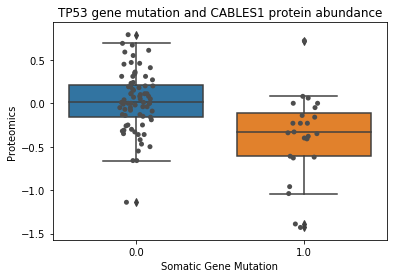

In [11]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=protein)
somatic_boxplot.set_title(gene + " gene mutation and " + protein + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")